In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from keras import metrics
from keras.models import model_from_json
from keras.callbacks import Callback
from keras import optimizers
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

Using TensorFlow backend.


In [2]:
total_classes = 96

line_folder = "../../../line_data"
op_folder = "./result/line"

X_train = np.load(line_folder + "/x_train.npy")
y_train = np.load(line_folder + "/y_train.npy")
X_test = np.load(line_folder + "/x_test.npy")
y_test = np.load(line_folder + "/y_test.npy")

# X_train = X_train[:1000]
# y_train = y_train[:1000]
# X_test = X_test[:1000]
# y_test = y_test[:1000]

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((57600, 28, 28, 3), (38400, 28, 28, 3), (57600, 96), (38400, 96))


In [3]:
X_train = X_train.reshape(57600, 28, 28, 3)
X_test = X_test.reshape(38400, 28, 28, 3)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((57600, 28, 28, 3), (38400, 28, 28, 3), (57600, 96), (38400, 96))


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, strides=1, activation="relu", input_shape=(28,28,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=1))
model.add(Conv2D(8, kernel_size=1, strides=1, activation="relu", input_shape=(28,28,3)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Flatten())
print (model.output_shape)
model.add(Dense(512, activation="relu"))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())
model.add(Dense(total_classes, activation="softmax"))


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
print (model.output_shape)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(None, 5000)
(None, 96)


Instructions for updating:
Use tf.cast instead.
Train on 57600 samples, validate on 38400 samples
Epoch 1/7
57600/57600 [==============================] - 120s 2ms/step - loss: 1.9698 - acc: 0.4597 - val_loss: 0.8363 - val_acc: 0.7328
Epoch 2/7
57600/57600 [==============================] - 117s 2ms/step - loss: 0.5153 - acc: 0.8357 - val_loss: 0.4127 - val_acc: 0.8557
Epoch 3/7
57600/57600 [==============================] - 116s 2ms/step - loss: 0.3178 - acc: 0.8958 - val_loss: 0.2022 - val_acc: 0.9332
Epoch 4/7
57600/57600 [==============================] - 116s 2ms/step - loss: 0.2496 - acc: 0.9164 - val_loss: 0.1402 - val_acc: 0.9604
Epoch 5/7
57600/57600 [==============================] - 116s 2ms/step - loss: 0.2123 - acc: 0.9274 - val_loss: 0.1979 - val_acc: 0.9311
Epoch 6/7
57600/57600 [==============================] - 116s 2ms/step - loss: 0.1841 - acc: 0.9368 - val_loss: 0.1411 - val_acc: 0.9480
Epoch 7/7
57600/57600 [==============================] - 116s 2ms/step - loss: 0

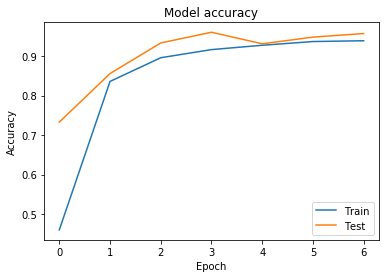

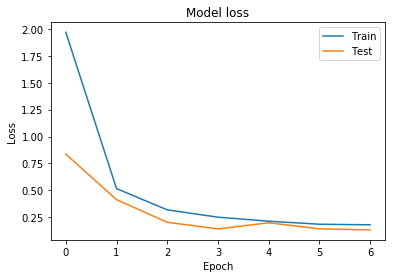

In [5]:
if not os.path.exists(op_folder):
    os.makedirs(op_folder)
    
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=100)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(op_folder + "/accuracy.png", bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(op_folder + "/loss.png", bbox_inches='tight')
plt.show()

In [6]:
# Final evaluation of the model
y_pred = model.predict(X_test)


In [7]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fscore = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

np.savetxt(op_folder + "/confusion_matrix.txt", cm, fmt="%d")
with open(op_folder + "/scores.txt", 'w') as the_file:
    the_file.write("Accuracy " + str(accuracy) + 
                  "\nPrecision " + str(precision) + 
                  "\nRecall " + str(recall) +
                  "\nFscore " + str(fscore))

print ("Accuracy " + str(accuracy) + 
      "\nPrecision " + str(precision) + 
      "\nRecall " + str(recall) +
      "\nFscore " + str(fscore))

Accuracy 0.957109375
Precision 0.961116913227459
Recall 0.957109375
Fscore 0.9565920925161743
